# <font color='blue'> 12.2 Extract Audio wave from signals </font>

* Import modules
* Specify conditions such as number of samples, sampling frequency, inner sample time & creating our mixed audio wave
* Add noise to the audio signal
* Estimate of Filter Window & Computing Cutoff Frequency
* Create a filter to filter out noise
* Plot the Noisy Signal, Frequency Response of Filter, Extracted Audio Wave, Frequency Spectrum of Mixed Audio Signal, Frequency Spectrum of our extracted Audio Signal
* Display plot

In [2]:
# Original, high sample rate signal, let us imagine this is like our analog signal
from scipy import signal
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Number of samples
N_sample = 512

# Sampling frequency
fs = 10000

# inter sample time = 0.0001s = 10kHz sampling
dt = 1/fs

# time vector
t = np.arange(0, N_sample)*dt

In [4]:
# Create signal vector that is the sum of 50 Hz, 1023 Hz, and 1735 Hz
Signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*1023*t)+np.sin(2*np.pi*1735*t)

# Add random noise to the signal
Signal = Signal+np.random.normal(0, .1, Signal.shape)

In [5]:
# Part A: Estimation of Length and Window to select design Specification
# Lower stopband frequency in Hz
fstop_L = 500

# Lower passband frequency in HZ
fpass_L = 800

# Upper stopband frequency in Hz
fstop_U = 1500

# Upper passband frequency in HZ
fpass_U = 1200

In [6]:
# Calculations
# Normalized lower transition band w.r.t. fs
del_f1 = abs(fpass_L-fstop_L)/fs

# Normalized upper transition band w.r.t. fs
del_f2 = abs(fpass_U-fstop_U)/fs

# Filter length using selected window based on Normalized lower transition band
N1 = 3.3/del_f1

# Filter length using selected window based on Normalized upper transition band
N2 = 3.3/del_f2
print('Filter length based on lower transition band:', N1)
print('Filter length based on upper transition band:', N2)

Filter length based on lower transition band: 110.0
Filter length based on upper transition band: 110.0


In [7]:
# Select length as the maximum of the N1 and N2 and if it is even, make it next higher integer
N = int(np.ceil(max(N1, N2)))
if(N % 2 == 0):
	N = N+1
print('Selected filter length :', N)

# Calculate lower and upper cut-off frequencies
# Lower cut-off frequency in Hz
fL = (fstop_L+fpass_L)/2

# Upper cut-off frequency in Hz
fU = (fstop_U+fpass_U)/2

# Normalized Lower cut-off frequency in (w/pi) rad
wL = 2*fL/fs

# Normalized upper cut-off frequency in (w/pi) rad
wU = 2*fU/fs

# Cutoff frequency array
cutoff = [wL, wU]

Selected filter length : 111


In [8]:
# Since the given specification of Stopband attenuation = 50 dB
# and Passband ripple = 0.05 dB, at least satisfied with Hamming window, we have to choose it.

# Determine Filter coefficients by calling the filter design function using Hamming window
b_ham = signal.firwin(N, cutoff, window="hamming", pass_zero="bandpass")

# Determine Frequency response of the filters to calculate response h at specified frequency, let points w for Hamming window
w, h_ham = signal.freqz(b_ham, a=1)

# Calculate Magnitude in dB and magnitude in decibels
h_dB_ham = 20*np.log10(abs(h_ham))

a = [1]

# Filter the noisy signal by designed filter by using signal.filtfilt
filtOut = signal.filtfilt(b_ham, a, Signal)

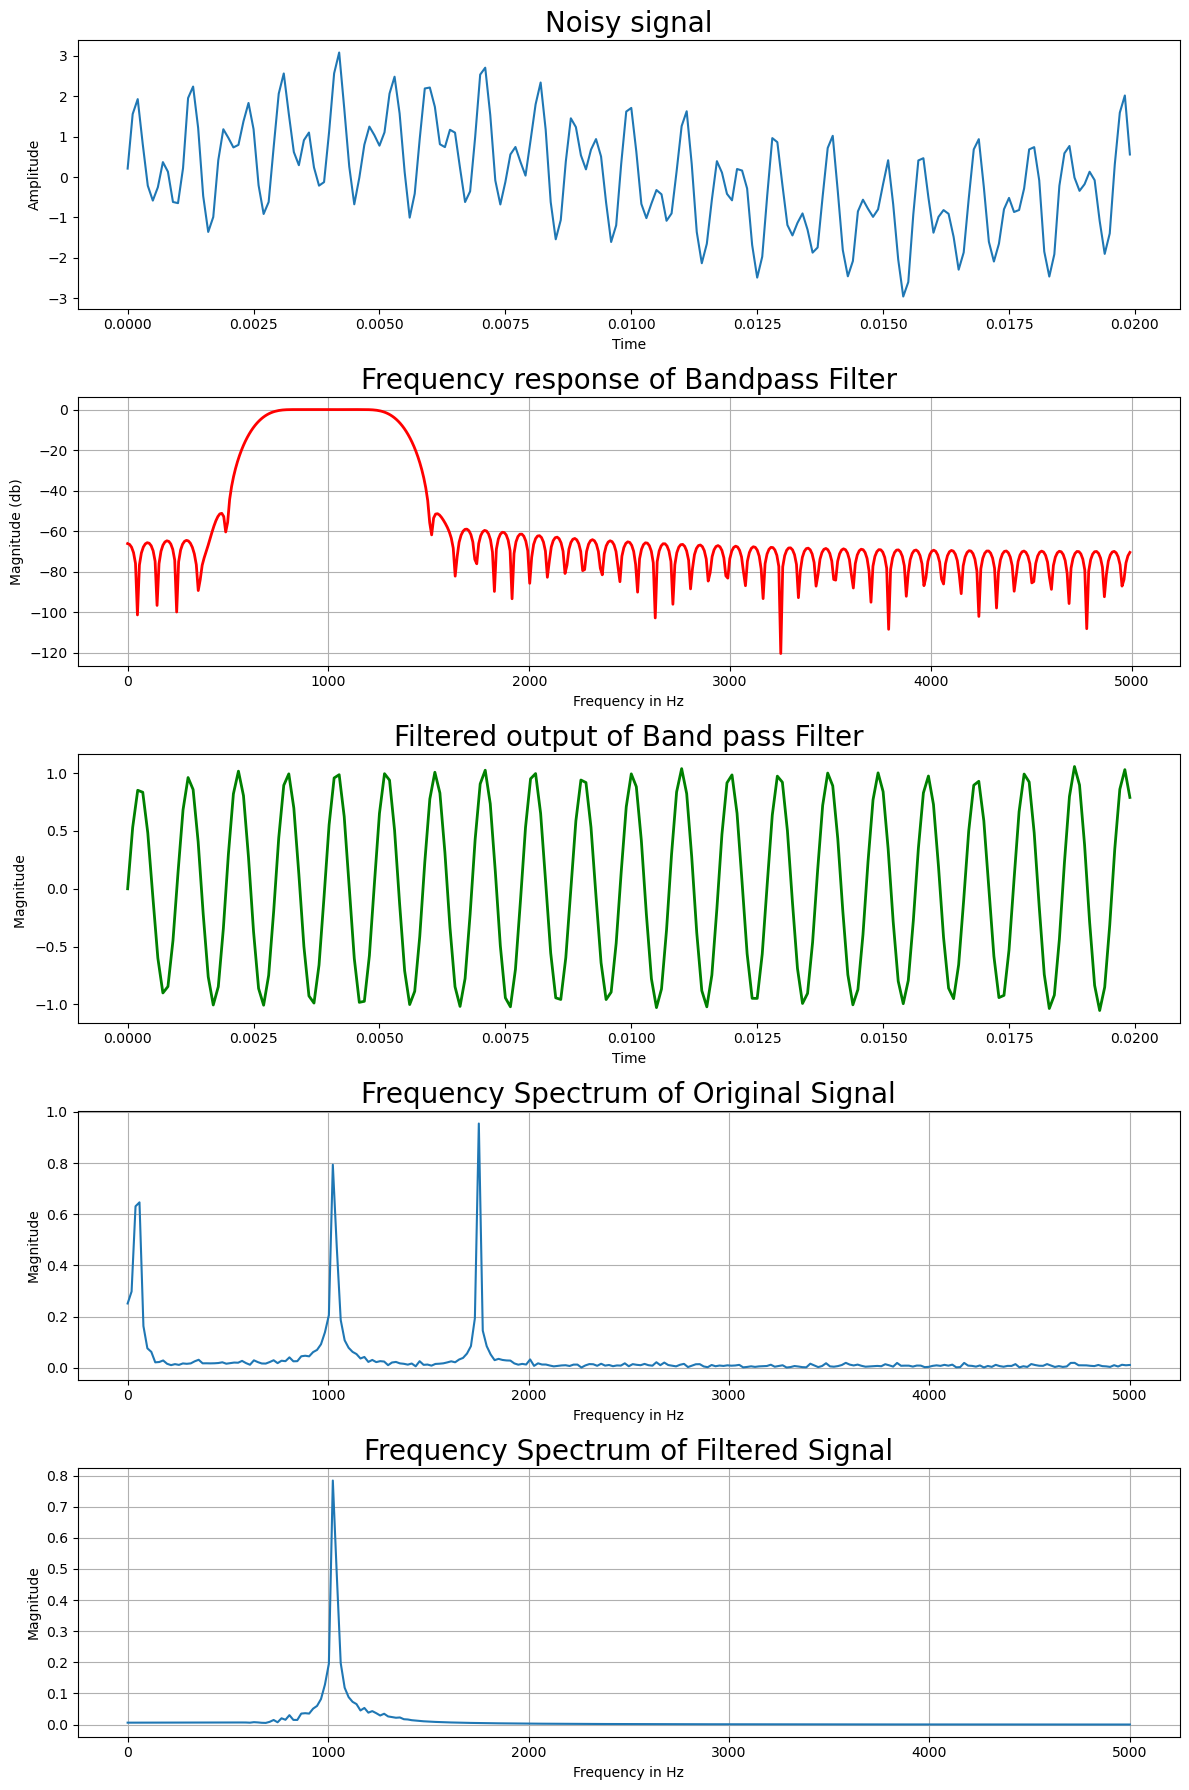

In [9]:
# Plot filter magnitude and phase responses using subplot. Digital frequency w converted in analog frequency
fig = plt.figure(figsize=(12, 18))

# Original signal
sub1 = plt.subplot(5, 1, 1)
sub1.plot(t[0:200], Signal[0:200])
sub1.set_ylabel('Amplitude')
sub1.set_xlabel('Time')
sub1.set_title('Noisy signal', fontsize=20)

# Magnitude response Plot
sub2 = plt.subplot(5, 1, 2)
sub2.plot(w*fs/(2*np.pi), h_dB_ham, 'r', label='Bandpass filter',
		linewidth='2') # Plot for magnitude response window

sub2.set_ylabel('Magnitude (db)')
sub2.set_xlabel('Frequency in Hz')
sub2.set_title('Frequency response of Bandpass Filter', fontsize=20)
sub2.axis = ([0, fs/2, -110, 5])
sub2.grid()

sub3 = plt.subplot(5, 1, 3)
sub3.plot(t[0:200], filtOut[0:200], 'g', label='Filtered signal',
		linewidth='2') # Plot for magnitude response window
sub3.set_ylabel('Magnitude ')
sub3.set_xlabel('Time')
sub3.set_title('Filtered output of Band pass Filter', fontsize=20)

# Show spectrum of noisy input signal
Sigf = fft(Signal) # Compute FFT of noisy signal
sub4 = plt.subplot(5, 1, 4)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub4.plot(xf, 2.0/N_sample * np.abs(Sigf[0:(N_sample-1)//2]))
sub4.set_ylabel('Magnitude')
sub4.set_xlabel('Frequency in Hz')
sub4.set_title('Frequency Spectrum of Original Signal', fontsize=20)
sub4.grid()

# Show spectrum of filtered output signal
Outf = fft(filtOut) # Compute FFT of filtered signal
sub5 = plt.subplot(5, 1, 5)
xf = np.linspace(0.0, 1.0/(2.0*dt), (N_sample-1)//2)
sub5.plot(xf, 2.0/N_sample * np.abs(Outf[0:(N_sample-1)//2]))
sub5.set_ylabel('Magnitude')
sub5.set_xlabel('Frequency in Hz')
sub5.set_title('Frequency Spectrum of Filtered Signal', fontsize=20)
sub5.grid()

fig.tight_layout()
plt.show()